**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [2]:
data = pd.read_csv(r"/content/Hotel Cancellation Prediction Analysis.csv")

In [3]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
52514,City Hotel,1,56,2016,June,24,8,0,1,2,...,No Deposit,191.0,NaN,0,Transient-Party,120.00,0,0,Canceled,02/06/2016
98146,City Hotel,0,276,2016,September,39,22,0,3,2,...,No Deposit,6.0,NaN,178,Transient-Party,58.17,0,0,Check-Out,25/09/2016
73167,City Hotel,1,176,2017,August,33,16,0,1,2,...,No Deposit,9.0,NaN,0,Transient,130.50,0,0,Canceled,19/07/2017
38435,Resort Hotel,0,3,2017,July,28,11,2,5,2,...,No Deposit,241.0,NaN,0,Transient,132.80,0,1,Check-Out,18/07/2017
85281,City Hotel,0,3,2016,March,11,11,0,1,2,...,No Deposit,9.0,NaN,0,Transient,109.00,0,1,Check-Out,12/03/2016


**Understanding the Dataset**



In [4]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [5]:
data.shape

(119390, 32)

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Check if there is null values**

In [8]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [9]:
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"],format='%d/%m/%Y')

**Summary Statistics**


In [10]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [11]:
for col in data.describe(include = "object").columns:
  print(col)
  print(data[col].unique())
  print("-"*80)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DO

In [12]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [13]:
data.drop(["company","agent"],axis=1,inplace = True)

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [16]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


**Exploratory Data analysis and Data cleaning**

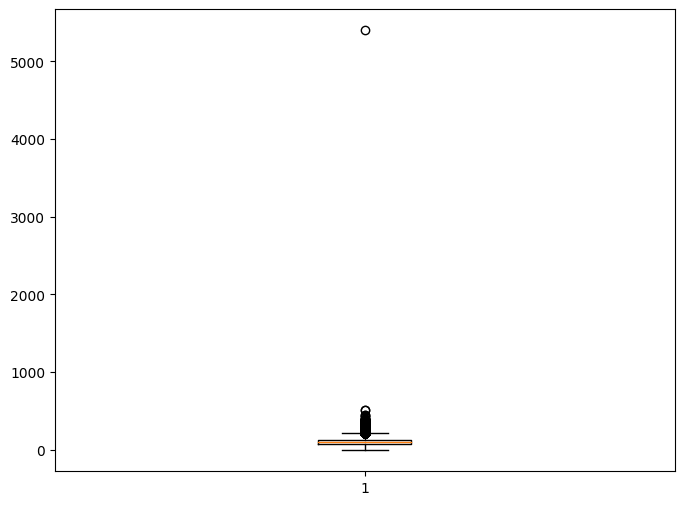

In [17]:
plt.figure(figsize=(8,6))
plt.boxplot(data["adr"])
plt.show()

In [18]:
data = data[data["adr"]<5000]

**Data Analysis and Visualisation**

In [19]:
cancelled_perc = data["is_canceled"].value_counts(normalize= True)

In [20]:
cancelled_perc * 100

,proportion
is_canceled,
0,62.865337
1,37.134663


<BarContainer object of 2 artists>

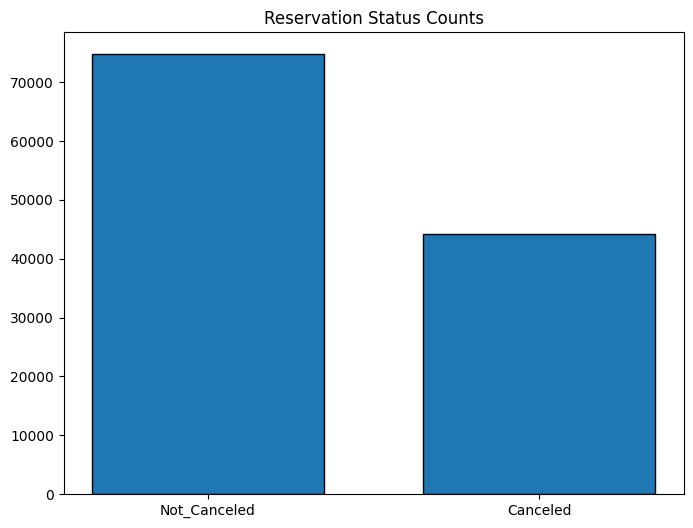

In [21]:
plt.figure(figsize=(8,6))
plt.title("Reservation Status Counts")
plt.bar(["Not_Canceled","Canceled"],data["is_canceled"].value_counts(),edgecolor = "k", width = 0.7)

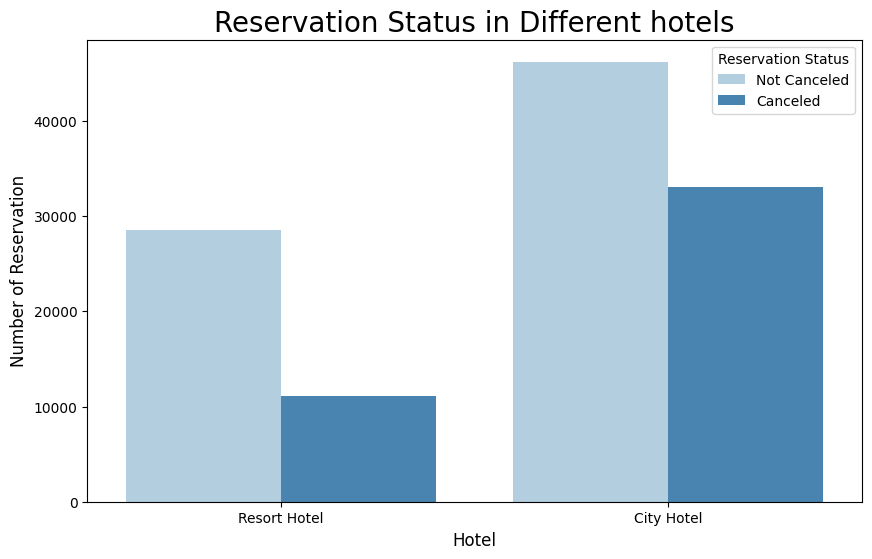

In [22]:
plt.figure(figsize=(10,6))
ax1= sns.countplot (x="hotel",hue = "is_canceled", data = data ,palette="Blues")
plt.title ("Reservation Status in Different hotels",size=20)
legend_labels = ['Not Canceled', 'Canceled']
ax1.legend(title='Reservation Status', labels=legend_labels)
plt.xlabel("Hotel",size=12)
plt.ylabel("Number of Reservation",size=12)
plt.show()

In [23]:
Resort_Hotel = data[data["hotel"] == "Resort Hotel"]
Resort_Hotel["is_canceled"].value_counts(normalize = True)

,proportion
is_canceled,
0,0.72025
1,0.27975


In [24]:
city_Hotel = data[data["hotel"] == "City Hotel"]
city_Hotel["is_canceled"].value_counts(normalize = True)

,proportion
is_canceled,
0,0.582918
1,0.417082


In [25]:
Resort_Hotel = Resort_Hotel.groupby("reservation_status_date")[["adr"]].mean()
city_Hotel = city_Hotel.groupby("reservation_status_date")[["adr"]].mean()

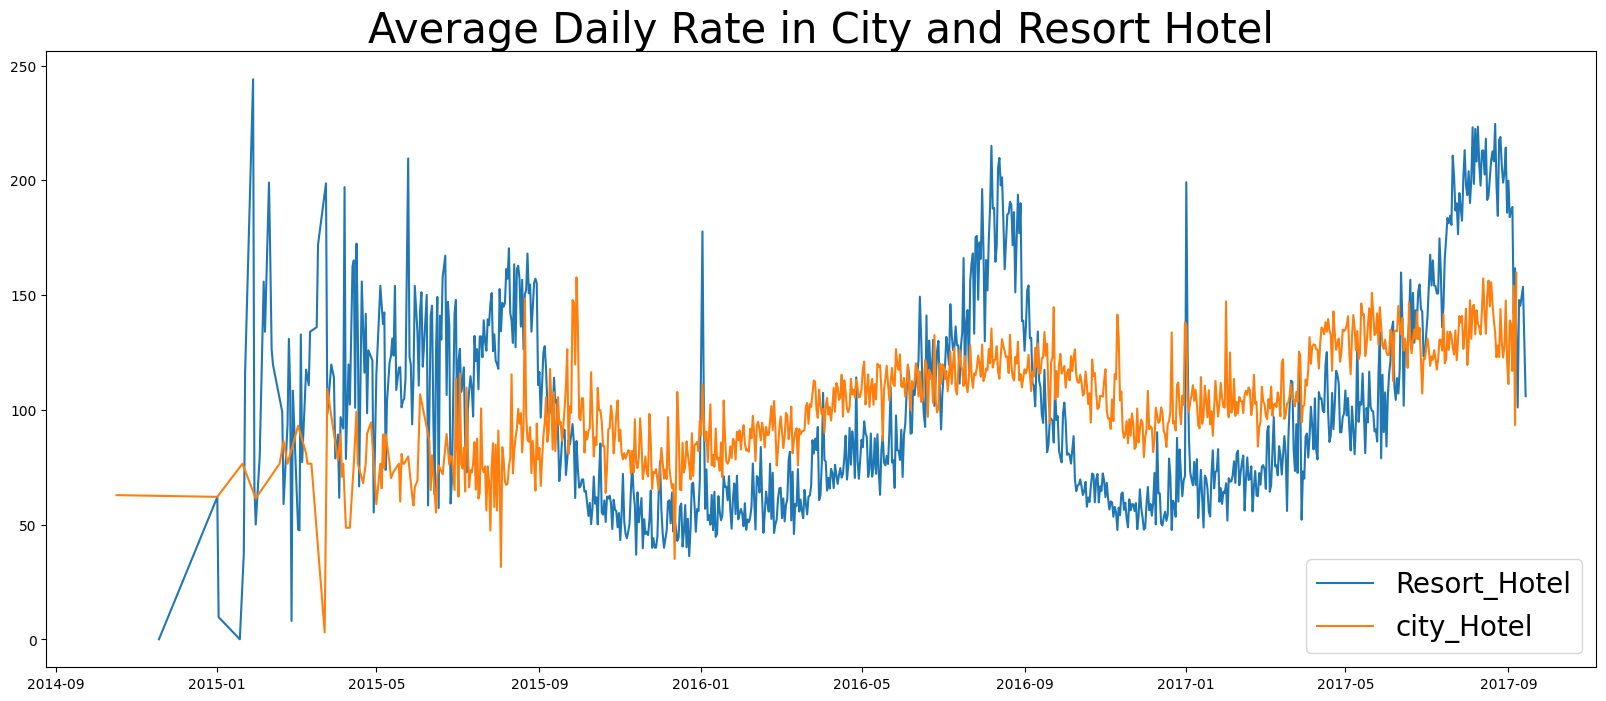

In [26]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort Hotel",fontsize = 30)
plt.plot(Resort_Hotel.index,Resort_Hotel["adr"],label = "Resort_Hotel")
plt.plot(city_Hotel.index,city_Hotel["adr"],label = "city_Hotel")
plt.legend(fontsize= 20)
plt.show()

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
data["month"]= data["reservation_status_date"].dt.month

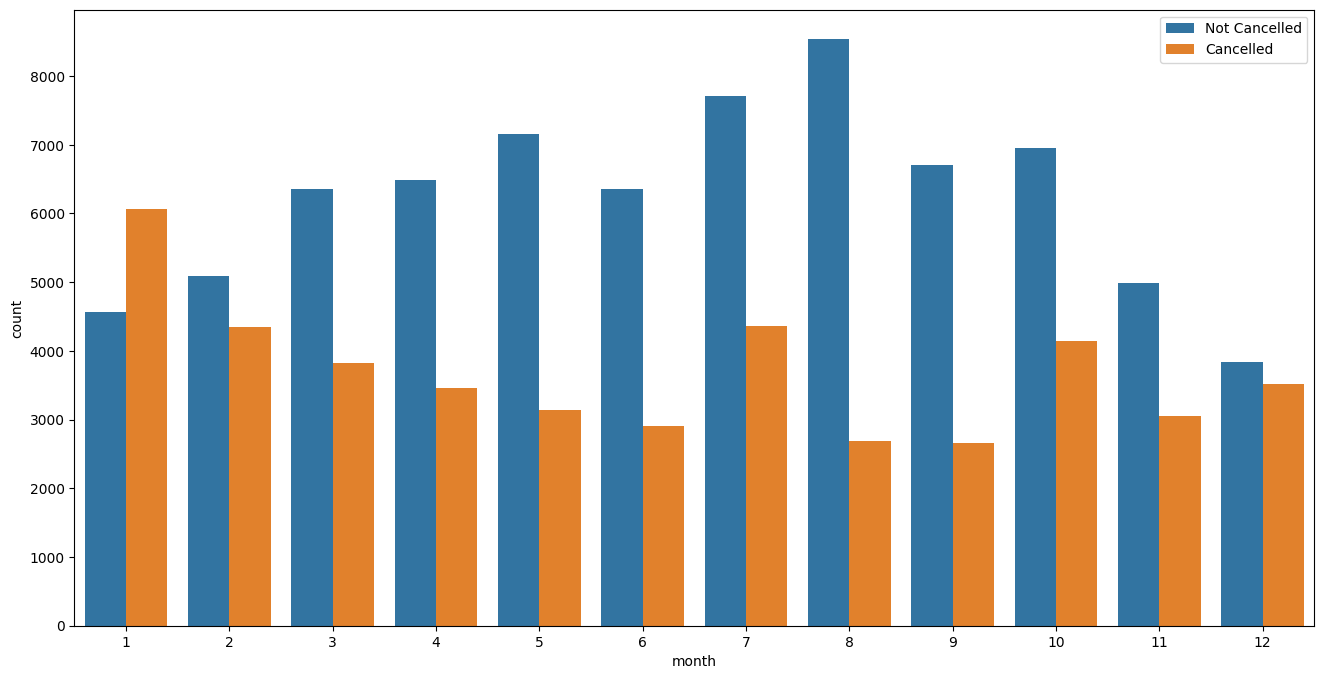

In [99]:
plt.figure(figsize=(16,8))
sns.countplot(x = "month" , hue = "is_canceled" , data=data)
plt.legend(["Not Cancelled","Cancelled"])

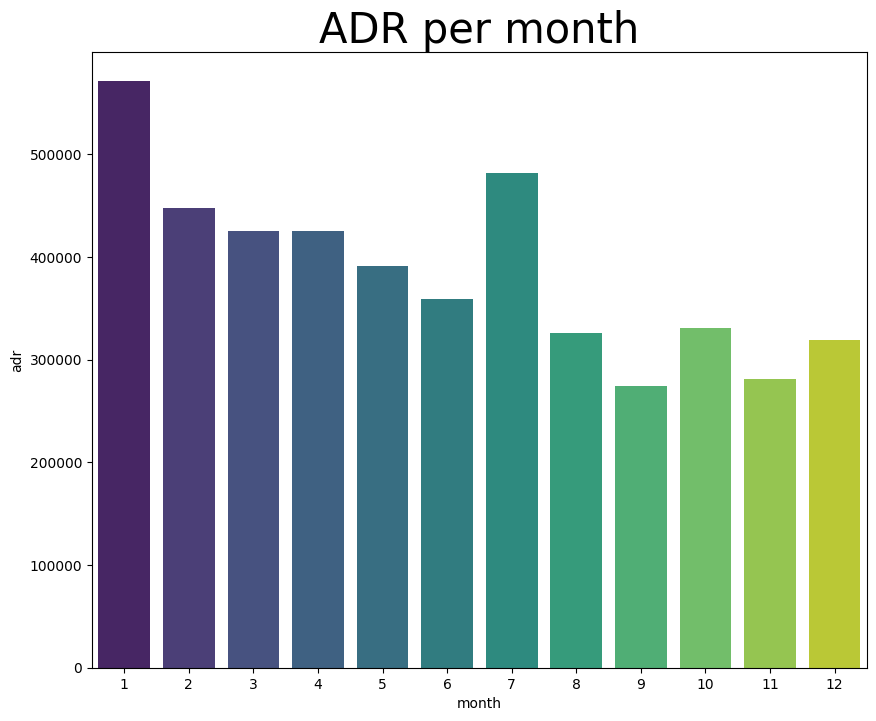

In [61]:
plt.figure(figsize=(10,8))
plt.title("ADR per month", fontsize=30)
sns.barplot(x="month", y="adr", data=data[data["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index(), palette="viridis")
plt.show()


In [31]:
data["country"].value_counts(ascending=False).head(10)

,count
country,
PRT,48585
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224


In [32]:
country_counts = data["country"].value_counts()

for country, count in country_counts.items():
    print(f"{country}: {count}")


PRT: 48585
GBR: 12129
FRA: 10415
ESP: 8568
DEU: 7287
ITA: 3766
IRL: 3375
BEL: 2342
BRA: 2224
NLD: 2104
USA: 2097
CHE: 1730
CN: 1279
AUT: 1263
SWE: 1024
CHN: 999
POL: 919
ISR: 669
RUS: 632
NOR: 607
ROU: 500
FIN: 447
DNK: 435
AUS: 426
AGO: 362
LUX: 287
MAR: 259
TUR: 248
HUN: 230
ARG: 214
JPN: 197
CZE: 171
IND: 152
KOR: 133
GRC: 128
DZA: 103
SRB: 101
HRV: 100
MEX: 85
EST: 83
IRN: 83
LTU: 81
ZAF: 80
BGR: 75
NZL: 74
COL: 71
UKR: 68
MOZ: 67
CHL: 65
SVK: 65
THA: 59
SVN: 57
ISL: 57
LVA: 55
ARE: 51
CYP: 51
TWN: 51
SAU: 48
PHL: 40
TUN: 39
SGP: 39
IDN: 35
NGA: 34
EGY: 32
URY: 32
LBN: 31
PER: 29
HKG: 29
MYS: 28
ECU: 27
VEN: 26
BLR: 26
CPV: 24
GEO: 22
JOR: 21
KAZ: 19
CRI: 19
GIB: 18
MLT: 18
OMN: 18
AZE: 17
KWT: 16
MAC: 16
QAT: 15
IRQ: 14
DOM: 14
PAK: 14
BIH: 13
MDV: 12
BGD: 12
ALB: 12
PRI: 12
SEN: 11
CMR: 10
MKD: 10
BOL: 10
PAN: 9
GNB: 9
TJK: 9
VNM: 8
CUB: 8
ARM: 8
JEY: 8
LBY: 8
AND: 7
MUS: 7
LKA: 7
CIV: 6
JAM: 6
KEN: 6
FRO: 5
MNE: 5
TZA: 5
BHR: 5
CAF: 5
SUR: 5
PRY: 4
BRB: 4
GTM: 4
UZB: 4
MCO: 4
GA

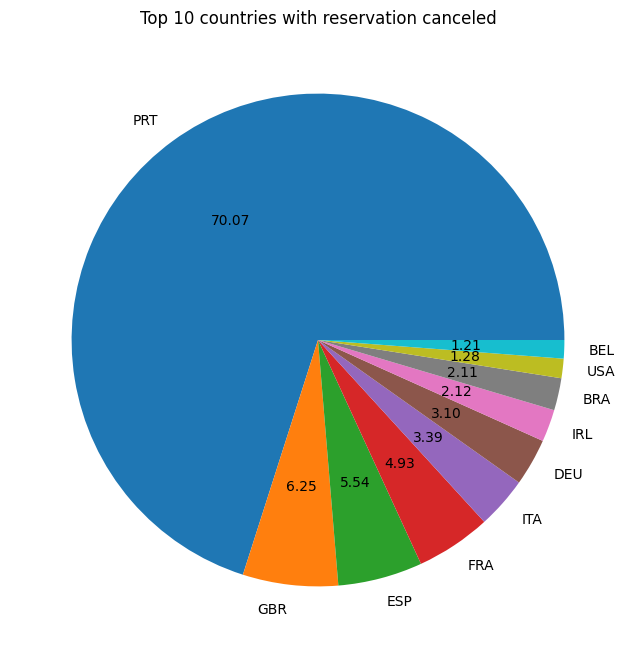

In [33]:
cancelled_data = data[data["is_canceled"] ==1 ]
top_10_country = cancelled_data["country"].value_counts()[:10]

plt.figure(figsize=(8,8))
plt.title ("Top 10 countries with reservation canceled")
plt.pie(top_10_country, autopct="%.2f", labels= top_10_country.index)
plt.show()

In [34]:
data["market_segment"].value_counts()

,count
market_segment,
Online TA,56402
Offline TA/TO,24159
Groups,19806
Direct,12448
Corporate,5111
Complementary,734
Aviation,237


In [35]:
data["market_segment"].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


In [36]:
data["year"]= data["reservation_status_date"].dt.year

In [37]:
data["day"] = data["reservation_status_date"].dt.day

In [38]:
data.drop("reservation_status_date",axis=1,inplace=True)

In [39]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'month', 'year', 'day'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
encoder = LabelEncoder()

In [71]:
data["hotel"] = encoder.fit_transform(data["hotel"])

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  int64  
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  int64  
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal                 

**Encoding Categorical Variables**

In [73]:
a= {"arrival_date_month","meal","country","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type","reservation_status","market_segment"}

In [74]:
for column in a:
    data[column] = encoder.fit_transform(data[column])

print(data.head())

   hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...             0   
1                        0                

In [75]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month,year,day
0,1,0,342,2015,5,27,1,0,0,2,...,0,0,2,0.0,0,0,1,7,2015,1
1,1,0,737,2015,5,27,1,0,0,2,...,0,0,2,0.0,0,0,1,7,2015,1
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,2,75.0,0,0,1,7,2015,2
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,2,75.0,0,0,1,7,2015,2
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,2,98.0,0,1,1,7,2015,3


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  int64  
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   arrival_date_year               118897 non-null  int64  
 4   arrival_date_month              118897 non-null  int64  
 5   arrival_date_week_number        118897 non-null  int64  
 6   arrival_date_day_of_month       118897 non-null  int64  
 7   stays_in_weekend_nights         118897 non-null  int64  
 8   stays_in_week_nights            118897 non-null  int64  
 9   adults                          118897 non-null  int64  
 10  children                        118897 non-null  float64
 11  babies                          118897 non-null  int64  
 12  meal                 

In [77]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month,year,day
0,1,0,342,2015,5,27,1,0,0,2,...,0,0,2,0.00,0,0,1,7,2015,1
1,1,0,737,2015,5,27,1,0,0,2,...,0,0,2,0.00,0,0,1,7,2015,1
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,2,75.00,0,0,1,7,2015,2
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,2,75.00,0,0,1,7,2015,2
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,2,98.00,0,1,1,7,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,2,96.14,0,0,1,9,2017,6
119386,0,0,102,2017,1,35,31,2,5,3,...,0,0,2,225.43,0,2,1,9,2017,7
119387,0,0,34,2017,1,35,31,2,5,2,...,0,0,2,157.71,0,4,1,9,2017,7
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,2,104.40,0,0,1,9,2017,7


In [83]:
x = data.drop("is_canceled",axis=1)

In [84]:
y = data["is_canceled"]

In [100]:
x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month,year,day
0,1,342,2015,5,27,1,0,0,2,0.0,...,0,0,2,0.00,0,0,1,7,2015,1
1,1,737,2015,5,27,1,0,0,2,0.0,...,0,0,2,0.00,0,0,1,7,2015,1
2,1,7,2015,5,27,1,0,1,1,0.0,...,0,0,2,75.00,0,0,1,7,2015,2
3,1,13,2015,5,27,1,0,1,1,0.0,...,0,0,2,75.00,0,0,1,7,2015,2
4,1,14,2015,5,27,1,0,2,2,0.0,...,0,0,2,98.00,0,1,1,7,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,1,35,30,2,5,2,0.0,...,0,0,2,96.14,0,0,1,9,2017,6
119386,0,102,2017,1,35,31,2,5,3,0.0,...,0,0,2,225.43,0,2,1,9,2017,7
119387,0,34,2017,1,35,31,2,5,2,0.0,...,0,0,2,157.71,0,4,1,9,2017,7
119388,0,109,2017,1,35,31,2,5,2,0.0,...,0,0,2,104.40,0,0,1,9,2017,7


In [101]:
y

,is_canceled
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


**Split Data into Train & Test**

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [87]:
x_train.shape

(95117, 31)

In [88]:
x_test.shape

(23780, 31)

In [89]:
x_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,month,year,day
81635,0,130,2016,0,16,13,0,4,2,0.0,...,1,10,2,100.00,0,0,0,12,2015,15
12335,1,278,2017,6,25,24,4,6,1,0.0,...,0,0,2,111.15,0,2,0,9,2016,24
109578,0,48,2017,0,15,10,1,3,3,0.0,...,0,0,2,198.00,0,2,1,4,2017,14
105428,0,10,2017,3,6,5,2,1,2,0.0,...,0,0,2,108.00,0,3,1,2,2017,8
45506,0,100,2015,10,44,31,1,1,2,0.0,...,0,0,3,62.00,0,0,0,10,2015,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46373,0,148,2015,2,53,30,1,4,2,0.0,...,1,79,2,67.00,0,0,0,11,2015,11
118445,0,176,2017,1,33,13,2,5,2,0.0,...,0,0,3,109.16,0,0,1,8,2017,20
43081,0,7,2015,11,38,14,1,2,2,0.0,...,0,0,0,152.00,0,1,1,9,2015,17
44035,0,83,2015,11,40,30,0,1,2,0.0,...,0,77,3,112.20,0,0,0,9,2015,29


In [90]:
y_train

,is_canceled
81635,1
12335,1
109578,0
105428,0
45506,1
...,...
46373,1
118445,0
43081,0
44035,1


**Using Descision Tree Classifier Algorithm**

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier()

In [93]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
pred_y = model.predict(x_test)

In [95]:
model.score(x_train,y_train)

1.0

In [96]:
model.score(x_test,y_test)

1.0

**Classification Report**

In [97]:
from sklearn.metrics import classification_report

In [98]:
print (classification_report(pred_y,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14812
           1       1.00      1.00      1.00      8968

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780

